In [10]:
plot_interval_sec = 1.2
t_last = time.time()
size_scale = 2e0

fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.update_layout(go.Layout(xaxis_title=cols[0]))
fig.add_trace(
    go.Scatter(
        x=[0],
        y=[0],
        marker_size=[0],
        mode="markers",
        name=f"{cols[1]}",
    ),
    secondary_y=False,
)
fig.add_trace(
    go.Scatter(
        x=[0],
        y=[0],
        marker_size=[0],
        mode="markers",
        name=f"{cols[2]}",
    ),
    secondary_y=True,
)
px_colors = px.colors.qualitative.Plotly
fig.update_yaxes(
    title_text="Distanch (inch/1000)",
    color=px_colors[0],
    rangemode="tozero",
    secondary_y=False,
)
fig.update_yaxes(
    title_text=r"$\frac{\text{Velocity}(\text{inch})}{1000 x \text{duty_cycle}(\text{~1ms})}$)",
    color=px_colors[1],
    rangemode="tozero",
    secondary_y=True,
)
fig = go.FigureWidget(fig)
display(fig, show_logs_btn, logs_text)


def update_fig(fig, df, dpi="?"):
    if df.empty:
        return

    df = df.abs()
    col = cols[1]
    counts = df.dropna(subset=col).loc[df["value"] > 0]
    fig.data[0].x = counts[cols[0]] - 5
    fig.data[0].y = counts["value"]
    fig.data[0].marker.size = size_scale * np.log(counts[col])

    col = cols[2]
    counts = df.dropna(subset=col).loc[df["value"] > 0]
    fig.data[1].x = counts[cols[0]] + 5
    fig.data[1].y = counts["value"]
    fig.data[1].marker.size = size_scale * np.log(counts[col])

    fig.layout.title = f"Current dpi: {dpi}, #samples: {df[col].sum()}"


update_fig(fig, df)

# f = sys.stdin
proc = sbp.Popen(["qmk", "console"], stdout=sbp.PIPE, universal_newlines=True)
f = proc.stdout
try:
    for dpi, *values in parsing_console(f, regex, parsers):
        data.update([(dpi, col, v) for col, v in zip(cols[1:], values, strict=True)])

        t = time.time()
        elapsed = t - t_last
        if elapsed < plot_interval_sec:
            continue
        t_last = t

        # print(dpi, values)

        df = to_df(data)
        with fig.batch_update():
            update_fig(fig, df, dpi)

except KeyboardInterrupt:
    pass
finally:
    proc.terminate()

FigureWidget({
    'data': [{'marker': {'size': [0]},
              'mode': 'markers',
              'name': 'Dinch',
              'type': 'scatter',
              'uid': '66dac31b-b283-4bef-88d7-784596161000',
              'x': [0],
              'xaxis': 'x',
              'y': [0],
              'yaxis': 'y'},
             {'marker': {'size': [0]},
              'mode': 'markers',
              'name': 'Vinch',
              'type': 'scatter',
              'uid': 'bfe1ce00-bfd6-4515-b841-2a57c2c7f3b8',
              'x': [0],
              'xaxis': 'x',
              'y': [0],
              'yaxis': 'y2'}],
    'layout': {'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 0.94], 'title': {'text': 'DPI'}},
               'yaxis': {'anchor': 'x',
                         'color': '#636EFA',
                         'domain': [0.0, 1.0],
                         'rangemode': 'tozero',
                         'title': {'text': 'Distanch (inch/1000)'}},
      

ToggleButton(value=False, description='Show logs (or max)? (click before launching cell)')

Text(value='8554: MAX: DPI: 400, Dinch: 25.0, Vinch: 7.5', layout=Layout(width='100%'))

Ψ Console Connected: Bastard Keyboards Charybdis (4x6) Splinky (A8F8:1833:1)


In [11]:
## Store collected logs, for the next time to run to appendp mose logs on top.
with open(fname.with_suffix(".pickle"), "wb") as f:
    pickle.dump(data, f)

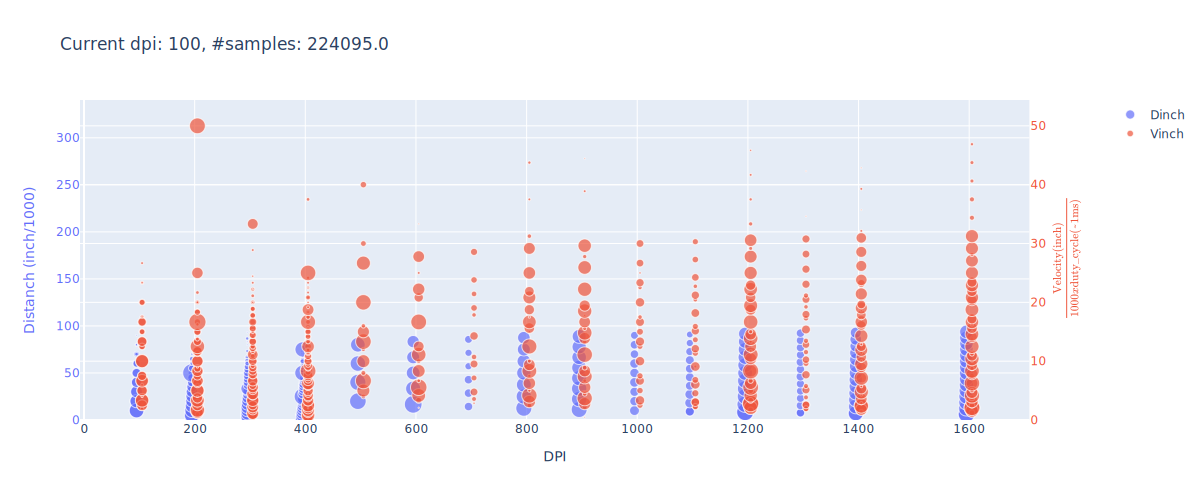

In [12]:
# Generate static diagrag for GitHub: https://plotly.com/python/static-image-export/
fig.show("svg", width=1200)
fig.show("notebook_connected", width=1200)